In [2]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy import ndimage
# import imutils

# def align_img(image, contour):
#     """Полный процесс выравнивания документа"""
#     # 1. Пытаемся найти контур страницы
#     ordered_contour = order_points(contour)
#     aligned = four_point_transform(image, ordered_contour.reshape(4, 2))
#     return aligned

# def four_point_transform(image, pts):
#     """Точное перспективное преобразование по 4 точкам"""
#     rect = order_points(pts)
#     (tl, tr, br, bl) = rect
    
#     # Вычисляем ширину новой изображения
#     width_a = np.linalg.norm(br - bl)
#     width_b = np.linalg.norm(tr - tl)
#     max_width = max(int(width_a), int(width_b))
    
#     # Вычисляем высоту новой изображения
#     height_a = np.linalg.norm(tr - br)
#     height_b = np.linalg.norm(tl - bl)
#     max_height = max(int(height_a), int(height_b))
    
#     # Точки назначения
#     dst = np.array([
#         [0, 0],
#         [max_width - 1, 0],
#         [max_width - 1, max_height - 1],
#         [0, max_height - 1]], dtype="float32")
    
#     # Перспективное преобразование
#     M = cv2.getPerspectiveTransform(rect, dst)
#     warped = cv2.warpPerspective(
#         image, M, (max_width, max_height),
#         flags=cv2.INTER_LINEAR,
#         borderMode=cv2.BORDER_CONSTANT,
#         borderValue=(255, 255, 255)
#     )
#     return warped

# def order_points(pts):
#     # Сортируем точки по x-координате
#     x_sorted = pts[np.argsort(pts[:, 0]), :]
    
#     # Разделяем на левые и правые точки
#     left_most = x_sorted[:2, :]
#     right_most = x_sorted[2:, :]
    
#     # Сортируем левые точки по y (верх-лев, низ-лев)
#     left_most = left_most[np.argsort(left_most[:, 1]), :]
#     tl, bl = left_most
    
#     # Сортируем правые точки по y (верх-прав, низ-прав)
#     right_most = right_most[np.argsort(right_most[:, 1]), :]
#     tr, br = right_most
    
#     return np.array([tl, tr, br, bl], dtype="float32")

# def rotate_image(image, angle):
#     """Улучшенный поворот изображения"""
#     if angle == 0:
#         return image
    
#     (h, w) = image.shape[:2]
#     center = (w // 2, h // 2)
    
#     # Вычисляем матрицу поворота
#     M = cv2.getRotationMatrix2D(center, angle, 1.0)
    
#     # Вычисляем новые границы изображения
#     cos = np.abs(M[0, 0])
#     sin = np.abs(M[0, 1])
    
#     new_w = int((h * sin) + (w * cos))
#     new_h = int((h * cos) + (w * sin))
    
#     # Корректируем матрицу поворота
#     M[0, 2] += (new_w - w) / 2
#     M[1, 2] += (new_h - h) / 2
    
#     # Поворачиваем с белым фоном
#     rotated = cv2.warpAffine(
#         image, M, (new_w, new_h),
#         flags=cv2.INTER_CUBIC,
#         borderMode=cv2.BORDER_CONSTANT,
#         borderValue=(255, 255, 255)
#     )
    
#     return rotated



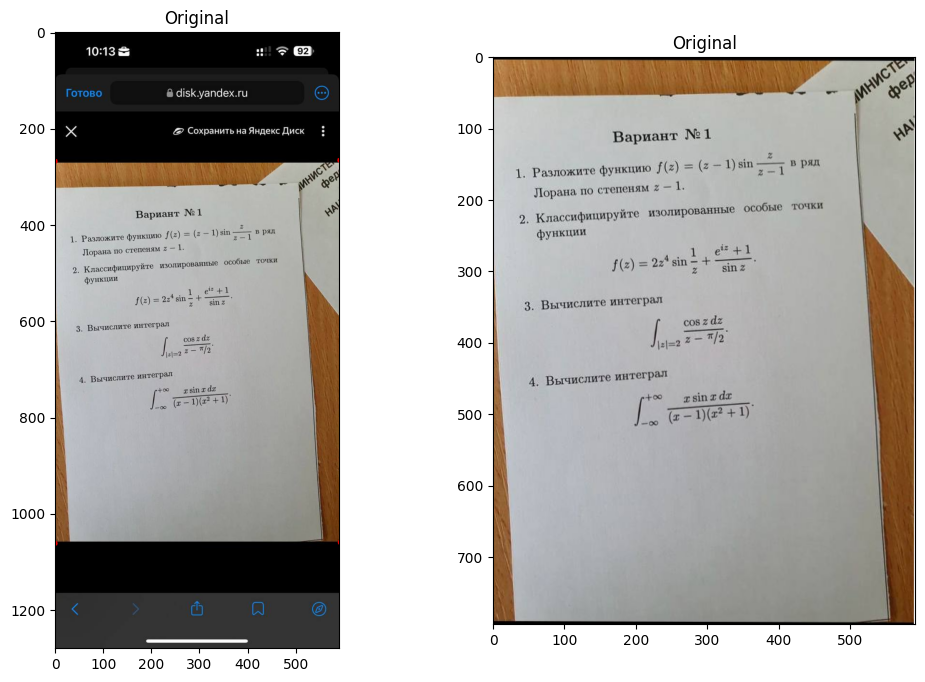

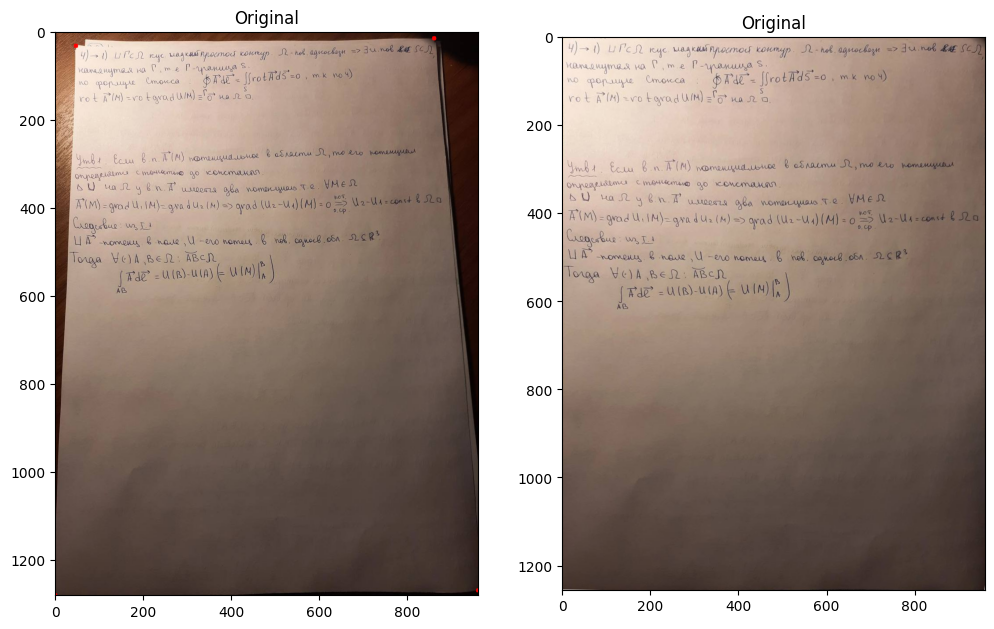

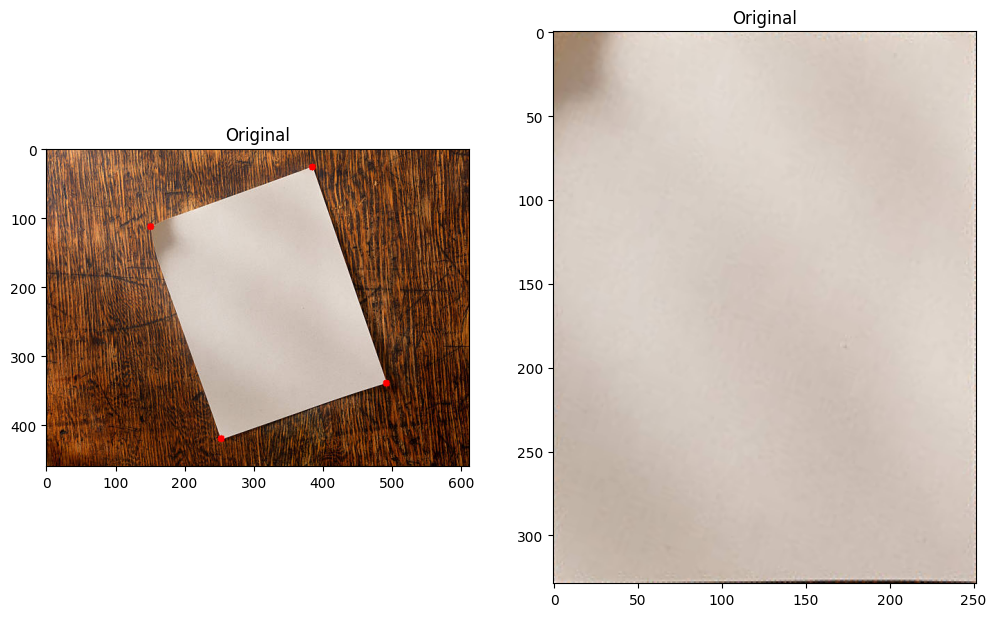

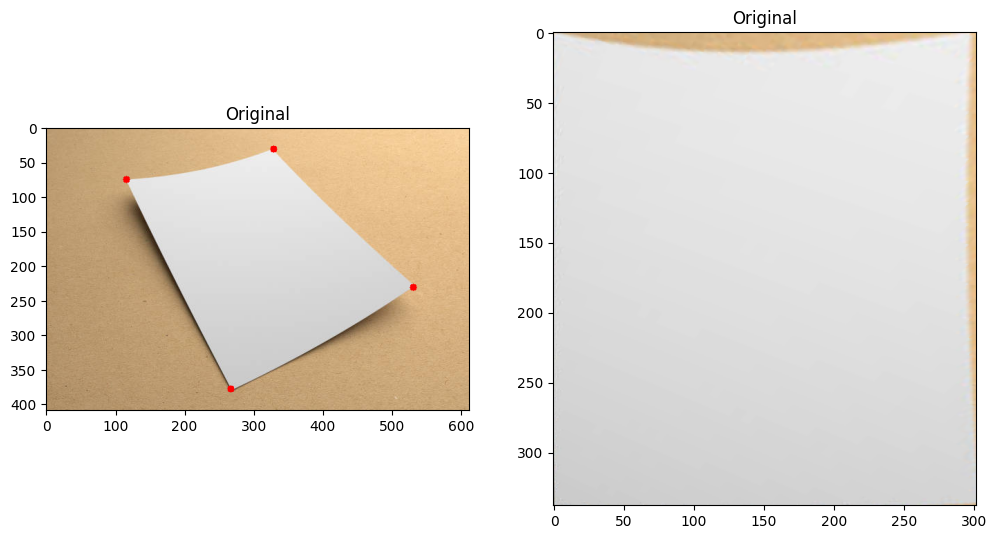

In [2]:
from find_contour import find_page_contour, align_img
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import imutils

names = ["kr1", "kr3", "paper", "table2"]
# names = ["table2"]

for name in names:
  image = cv2.imread(f"../data/{name}.jpg")

  enchanced_img = find_page_contour(image, a=180, c=5)
  aligned_img = align_img(image, enchanced_img)
  for point in enchanced_img:
    cv2.circle(image, point, 5, (0, 0, 255), -1)
  plt.figure(figsize=(12, 8))
  plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
  plt.subplot(122), plt.imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB)), plt.title('Original')